# ***机器学习策略（下）***

# 1. 误差分析

① 对已经建立的机器学习模型进行错误分析（error analysis）十分必要，而且有针对性地、正确地进行error analysis更加重要。

② 举个例子，猫类识别问题，已经建立的模型的错误率为10%。为了提高正确率，我们发现该模型会将一些狗类图片错误分类成猫。

③ 一种常规解决办法是扩大狗类样本，增强模型对够类（负样本）的训练。

④ 但是，这一过程可能会花费几个月的时间，耗费这么大的时间成本到底是否值得呢？也就是说扩大狗类样本，重新训练模型，对提高模型准确率到底有多大作用？这时候我们就需要进行error analysis，帮助我们做出判断。

① 方法很简单，我们可以从分类错误的样本中统计出狗类的样本数量。根据狗类样本所占的比重，判断这一问题的重要性。

② 假如狗类样本所占比重仅为5%，即时我们花费几个月的时间扩大狗类样本，提升模型对其识别率，改进后的模型错误率最多只会降低到9.5%。相比之前的10%，并没有显著改善。我们把这种性能限制称为ceiling on performance。

③ 相反，假如错误样本中狗类所占比重为50%，那么改进后的模型错误率有望降低到5%，性能改善很大。因此，值得去花费更多的时间扩大狗类样本。

① 这种error analysis虽然简单，但是能够避免花费大量的时间精力去做一些对提高模型性能收效甚微的工作，让我们专注解决影响模型正确率的主要问题，十分必要。

② 这种error analysis可以同时评估多个影响模型性能的因素，通过各自在错误样本中所占的比例来判断其重要性。例如，猫类识别模型中，可能有以下几个影响因素：

 - Fix pictures of dogs being recognized as cats

 - Fix great cats(lions, panthers, etc…) being misrecognized

 - Improve performance on blurry images
 
③ 通常来说，比例越大，影响越大，越应该花费时间和精力着重解决这一问题。这种error analysis让我们改进模型更加有针对性，从而提高效率。

# 2. 数据标签不正确

① 监督式学习中，训练样本有时候会出现输出y标注错误的情况，即incorrectly labeled examples。

② 如果这些label标错的情况是随机性的（random errors），DL算法对其包容性是比较强的，即健壮性好，一般可以直接忽略，无需修复。

③ 然而，如果是系统错误（systematic errors），这将对DL算法造成影响，降低模型性能。

① 刚才说的是训练样本中出现incorrectly labeled data，如果是dev/test sets中出现incorrectly labeled data，该怎么办呢？

② 方法很简单，利用上节内容介绍的error analysis，统计dev sets中所有分类错误的样本中incorrectly labeled data所占的比例。

③ 根据该比例的大小，决定是否需要修正所有incorrectly labeled data，还是可以忽略。举例说明，若：

 - Overall dev set error: 10%

 - Errors due incorrect labels: 0.6%

 - Errors due to other causes: 9.4%
 
④ 上面数据表明Errors due incorrect labels所占的比例仅为0.6%，占dev set error的6%，而其它类型错误占dev set error的94%。因此，这种情况下，可以忽略incorrectly labeled data。

① 如果优化DL算法后，出现下面这种情况：

 - Overall dev set error: 2%

 - Errors due incorrect labels: 0.6%

 - Errors due to other causes: 1.4%
 
② 上面数据表明Errors due incorrect labels所占的比例依然为0.6%，但是却占dev set error的30%，而其它类型错误占dev set error的70%。

③ 因此，这种情况下，incorrectly labeled data不可忽略，需要手动修正。

① 我们知道，dev set的主要作用是在不同算法之间进行比较，选择错误率最小的算法模型。

② 但是，如果有incorrectly labeled data的存在，当不同算法错误率比较接近的时候，我们无法仅仅根据Overall dev set error准确指出哪个算法模型更好，必须修正incorrectly labeled data。

③ 关于修正incorrect dev/test set data，有几条建议：

 - Apply same process to your dev and test sets to make sure they continue to come from the same distribution

 - Consider examining examples your algorithm got right as well as ones it got wrong

 - Train and dev/test data may now come from slightly different distributions

# 3. 构建模型

① 对于如何构建一个机器学习应用模型，Andrew给出的建议是先快速构建第一个简单模型，然后再反复迭代优化。

 - Set up dev/test set and metric

 - Build initial system quickly

 - Use Bias/Variance analysis & Error analysis to prioritize next steps

# 4. 训练集和测试集不同分布

① 当train set与dev/test set不来自同一个分布的时候，我们应该如何解决这一问题，构建准确的机器学习模型呢？

② 以猫类识别为例，train set来自于网络下载（webpages），图片比较清晰；dev/test set来自用户手机拍摄（mobile app），图片比较模糊。

③ 假如train set的大小为200000，而dev/test set的大小为10000，显然train set要远远大于dev/test set。

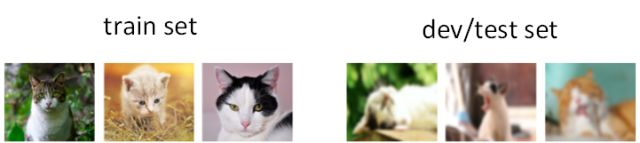

① 虽然dev/test set质量不高，但是模型最终主要应用在对这些模糊的照片的处理上。

② 面对train set与dev/test set分布不同的情况，有两种解决方法。

③ 第一种方法是将train set和dev/test set完全混合，然后再随机选择一部分作为train set，另一部分作为dev/test set。

 - 例如，混合210000例样本，然后随机选择205000例样本作为train set，2500例作为dev set，2500例作为test set。
 
 - 这种做法的优点是实现train set和dev/test set分布一致，缺点是dev/test set中webpages图片所占的比重比mobile app图片大得多。
 
 - 例如dev set包含2500例样本，大约有2381例来自webpages，只有119例来自mobile app。
 
 - 这样，dev set的算法模型对比验证，仍然主要由webpages决定，实际应用的mobile app图片所占比重很小，达不到验证效果。
 
 - 因此，这种方法并不是很好。
 
④ 第二种方法是将原来的train set和一部分dev/test set组合当成train set，剩下的dev/test set分别作为dev set和test set。

 - 例如，200000例webpages图片和5000例mobile app图片组合成train set，剩下的2500例mobile app图片作为dev set，2500例mobile app图片作为test set。
 
 - 其关键在于dev/test set全部来自于mobile app。
 
 - 这样保证了验证集最接近实际应用场合。这种方法较为常用，而且性能表现比较好。

① 我们之前介绍过，根据human-level error、training error和dev error的相对值可以判定是否出现了bias或者variance。

② 但是，需要注意的一点是，如果train set和dev/test set来源于不同分布，则无法直接根据相对值大小来判断。

③ 例如某个模型human-level error为0%，training error为1%，dev error为10%。

④ 根据我们之前的理解，显然该模型出现了variance。但是，training error与dev error之间的差值9%可能来自算法本身（variance），也可能来自于样本分布不同。

⑤ 比如dev set都是很模糊的图片样本，本身就难以识别，跟算法模型关系不大。因此不能简单认为出现了variance。

① 在可能伴有train set与dev/test set分布不一致的情况下，定位是否出现variance的方法是设置train-dev set。

② Andrew给train-dev set的定义是：“Same distribution as training set, but not used for training.”也就是说，从原来的train set中分割出一部分作为train-dev set，train-dev set不作为训练模型使用，而是与dev set一样用于验证。

③ 这样，我们就有training error、training-dev error和dev error三种error。其中，training error与training-dev error的差值反映了variance；training-dev error与dev error的差值反映了data mismatch problem，即样本分布不一致。

① 举例说明，如果training error为1%，training-dev error为9%，dev error为10%，则variance问题比较突出。

② 如果training error为1%，training-dev error为1.5%，dev error为10%，则data mismatch problem比较突出。

③ 通过引入train-dev set，能够比较准确地定位出现了variance还是data mismatch。

① 总结一下human-level error、training error、training-dev error、dev error以及test error之间的差值关系和反映的问题：

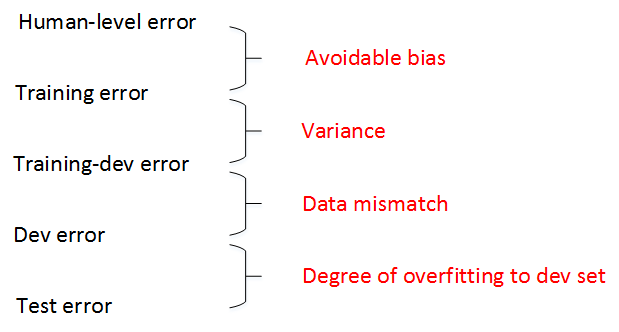

② 一般情况下，human-level error、training error、training-dev error、dev error以及test error的数值是递增的，但是也会出现dev error和test error下降的情况。这主要可能是因为训练样本比验证/测试样本更加复杂，难以训练。

① 关于如何解决train set与dev/test set样本分布不一致的问题，有两条建议：

 - Carry out manual error analysis to try to understand difference between training dev/test sets

 - Make training data more similar; or collect more data similar to dev/test sets
 
② 为了让train set与dev/test set类似，我们可以使用人工数据合成的方法（artificial data synthesis）。

③ 例如说话人识别问题，实际应用场合（dev/test set）是包含背景噪声的，而训练样本train set很可能没有背景噪声。

④ 为了让train set与dev/test set分布一致，我们可以在train set上人工添加背景噪声，合成类似实际场景的声音。这样会让模型训练的效果更准确。

⑤ 但是，需要注意的是，我们不能给每段语音都增加同一段背景噪声，这样会出现对背景噪音的过拟合，效果不佳。这就是人工数据合成需要注意的地方。

# 5. 迁移学习

① 深度学习非常强大的一个功能之一就是有时候你可以将已经训练好的模型的一部分知识（网络结构）直接应用到另一个类似模型中去。

② 比如我们已经训练好一个猫类识别的神经网络模型，那么我们可以直接把该模型中的一部分网络结构应用到使用X光片预测疾病的模型中去。

③ 这种学习方法被称为迁移学习（Transfer Learning）。

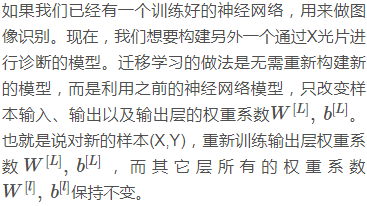

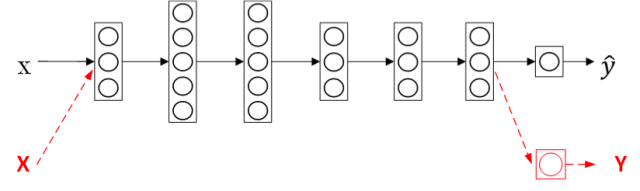

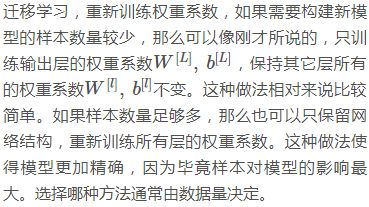

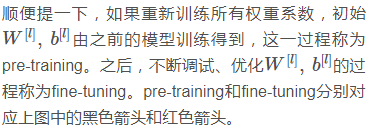

① 迁移学习之所以能这么做的原因是，神经网络浅层部分能够检测出许多图片固有特征，例如图像边缘、曲线等。

② 使用之前训练好的神经网络部分结果有助于我们更快更准确地提取X光片特征。

③ 二者处理的都是图片，而图片处理是有相同的地方，第一个训练好的神经网络已经帮我们实现如何提取图片有用特征了。

④ 因此，即便是即将训练的第二个神经网络样本数目少，仍然可以根据第一个神经网络结构和权重系数得到健壮性好的模型。

① 迁移学习可以保留原神经网络的一部分，再添加新的网络层。具体问题，具体分析，可以去掉输出层后再增加额外一些神经层。

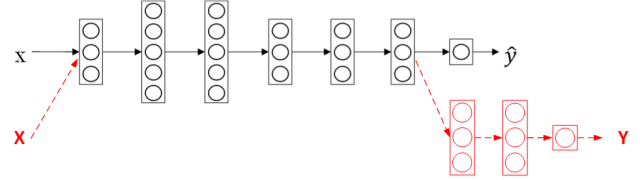

② 总体来说，迁移学习的应用场合主要包括三点：

 - Task A and B have the same input x.

 - You have a lot more data for Task A than Task B.

 - Low level features from A could be helpful for learning B.

# 6. 多任务学习

① 顾名思义，多任务学习（multi-task learning）就是构建神经网络同时执行多个任务。

② 这跟二元分类或者多元分类都不同，多任务学习类似将多个神经网络融合在一起，用一个网络模型来实现多种分类效果。

③ 如果有C个，那么输出y的维度是(C,1)。

④ 例如汽车自动驾驶中，需要实现的多任务为行人、车辆、交通标志和信号灯。如果检测出汽车和交通标志，则y为：

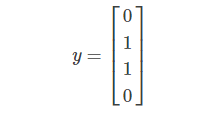

⑤ 多任务学习模型的cost function为：

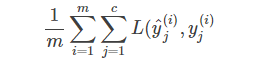

⑥ 其中，j表示任务下标，总有c个任务。对应的loss function为：

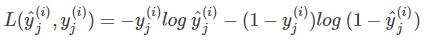

⑦ 值得一提的是，Multi-task learning与Softmax regression的区别在于Softmax regression是single label的，即输出向量y只有一个元素为1；而Multi-task learning是multiple labels的，即输出向量y可以有多个元素为1。

① 多任务学习是使用单个神经网络模型来实现多个任务。

② 实际上，也可以分别构建多个神经网络来实现。但是，如果各个任务之间是相似问题（例如都是图片类别检测），则可以使用多任务学习模型。

③ 另外，多任务学习中，可能存在训练样本Y某些label空白的情况，这并不影响多任务模型的训练。



① 总体来说，多任务学习的应用场合主要包括三点：

 - Training on a set of tasks that could benefit from having shared lower-level features.

 - Usually: Amount of data you have for each task is quite similar.

 - Can train a big enough neural network to do well on all the tasks.
 
② 顺便提一下，迁移学习和多任务学习在实际应用中，迁移学习使用得更多一些。

# 7. 端到端深度学习

① 端到端（end-to-end）深度学习就是将所有不同阶段的数据处理系统或学习系统模块组合在一起，用一个单一的神经网络模型来实现所有的功能。

② 它将所有模块混合在一起，只关心输入和输出。

③ 以语音识别为例，传统的算法流程和end-to-end模型的区别如下：

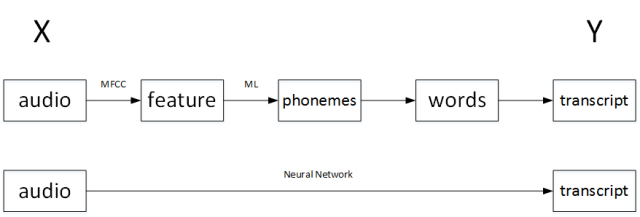

① 如果训练样本足够大，神经网络模型足够复杂，那么end-to-end模型性能比传统机器学习分块模型更好。

② 实际上，end-to-end让神经网络模型内部去自我训练模型特征，自我调节，增加了模型整体契合度。

① end-to-end深度学习有优点也有缺点。

② 优点：

 - Let the data speak

 - Less hand-designing of components needed

③ 缺点：

 - May need large amount of data

 - Excludes potentially useful hand-designed